In [1]:
#Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
dataset = pd.read_csv("smartwatches.csv")

In [5]:
# Display the first few rows
dataset.head()

,Unnamed: 0,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
0,0,noise,82990.0,89900.0,7.686318,4.0,65.0,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,NaN,NaN,NaN,NaN,8.0,Yes,NaN,35 - 50 g
1,1,fire-boltt,3799.0,16999.0,77.651627,4.3,20788.0,BSW046,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,50 - 75 g
2,2,boat,1999.0,7990.0,74.981227,3.8,21724.0,Wave Call,NaN,NaN,Silicon,Yes,8.0,Yes,1.7 inches,35 - 50 g
3,3,fire-boltt,1799.0,19999.0,91.004550,4.3,13244.0,BSW053,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,75g +
4,4,noise,1599.0,4999.0,68.013603,4.1,13901.0,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,8.0,Yes,1.7 inches,35 - 50 g


In [7]:
#Data Preprocessing (handling missing values, encoding categorical variables, feature selection)

In [9]:
# Drop rows with missing values and select relevant features and target
dataset_clean = dataset[['Current Price', 'Original Price', 'Discount Percentage', 'Rating', 'Number OF Ratings', 'Battery Life (Days)', 'Brand']].dropna()


In [11]:
# Convert 'Brand' into numerical categories for regression tasks
dataset_clean['Brand'] = dataset_clean['Brand'].astype('category').cat.codes

In [25]:
X = dataset_clean[['Current Price', 'Original Price', 'Discount Percentage', 'Rating', 'Number OF Ratings', 'Battery Life (Days)']]
y = dataset_clean['Brand']

In [27]:
# Split the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
# Initialize and train the Random Forest Regressor
regressor = RandomForestRegressor(n_estimators=100, random_state=42)

In [31]:
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [33]:
# Predict on test set
y_pred = regressor.predict(X_test)

In [35]:
# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")

R-squared: 0.2697903486946488
Mean Squared Error: 19.14005108695652


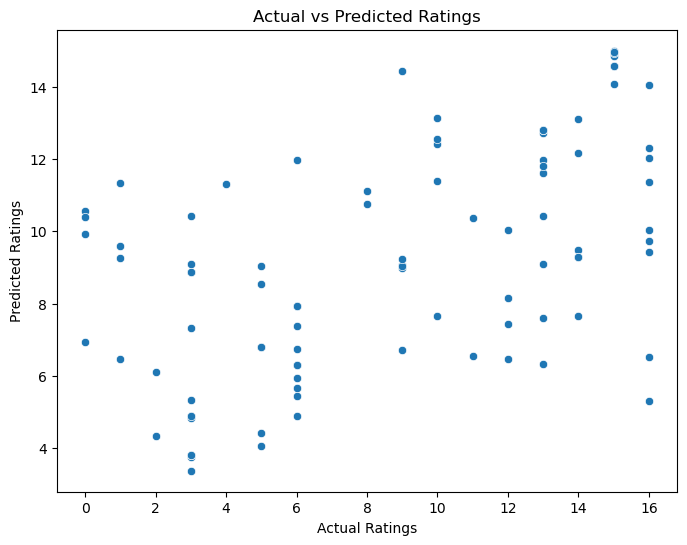

In [37]:
# Plot Actual vs Predicted Ratings
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.title('Actual vs Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()

In [75]:
#Classification (Price Range Classification)

In [77]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [79]:
# Encode the categorical variables using LabelEncoder
le_brand = LabelEncoder()
le_strap = LabelEncoder()

In [81]:
# Apply LabelEncoder on the categorical columns
dataset['Brand'] = le_brand.fit_transform(dataset['Brand'].fillna('Unknown'))  # Handle missing values by filling with 'Unknown'
dataset['Strap Material'] = le_strap.fit_transform(dataset['Strap Material'].fillna('Unknown'))

In [83]:
# Define features and target for classification
X_class = dataset[['Discount Percentage', 'Battery Life (Days)', 'Brand', 'Strap Material']].fillna(0)  # Fill missing values with 0 or appropriate values
y_class = dataset['Price Range']

In [85]:
# Split the data for classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.3, random_state=42)

In [87]:
# Initialize and train the Random Forest Classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train_class, y_train_class)

RandomForestClassifier(random_state=42)

In [89]:
# Predict on test set
y_pred_class = classifier.predict(X_test_class)

In [91]:
# Evaluate the classification model
accuracy = accuracy_score(y_test_class, y_pred_class)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8592592592592593


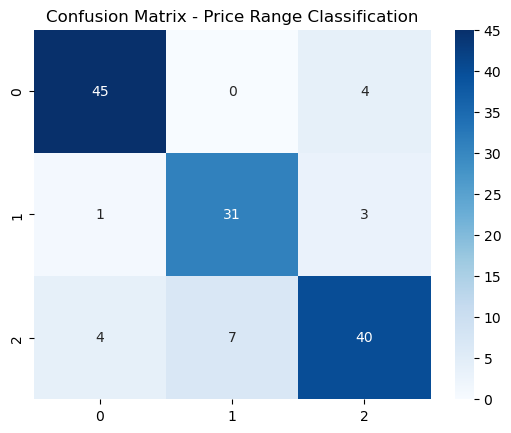

In [93]:
# Confusion Matrix
cm = confusion_matrix(y_test_class, y_pred_class)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Price Range Classification')
plt.show()

In [97]:
#K-Means Clustering

In [99]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

In [101]:
# Feature selection for clustering
X_cluster = dataset[['Current Price', 'Battery Life (Days)', 'Discount Percentage']]

In [103]:
# Handle missing values by imputing them (e.g., using mean)
imputer = SimpleImputer(strategy='mean')
X_cluster_imputed = imputer.fit_transform(X_cluster)

In [105]:
# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster_imputed)

In [107]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

C:\Users\Kanishka\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [109]:
# Add clusters to the dataset
dataset['Cluster'] = clusters

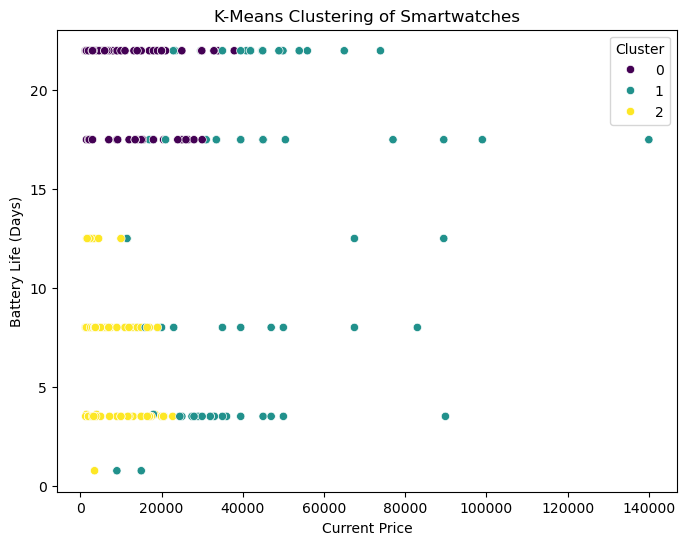

In [111]:
# Visualize the clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=dataset['Current Price'], y=dataset['Battery Life (Days)'], hue=dataset['Cluster'], palette='viridis')
plt.title('K-Means Clustering of Smartwatches')
plt.show()

In [113]:
# Correlation heatmap

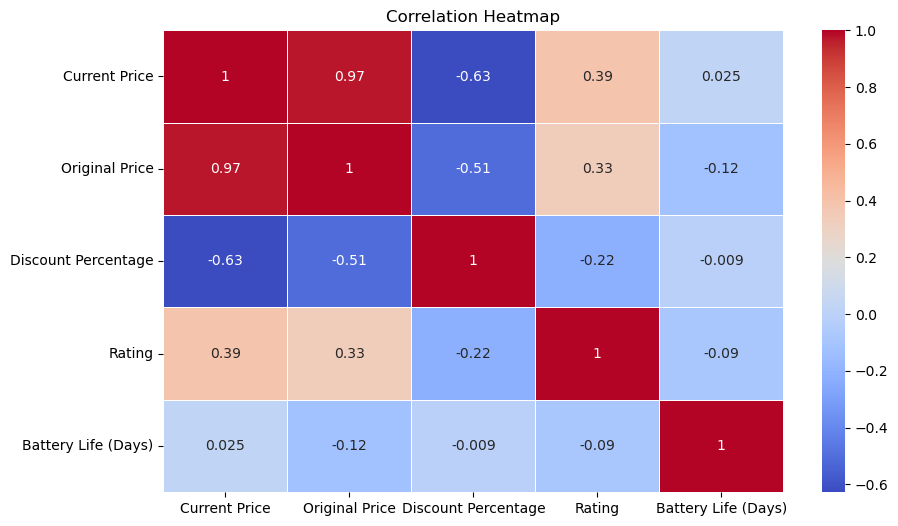

In [115]:
plt.figure(figsize=(10,6))
corr = dataset[['Current Price', 'Original Price', 'Discount Percentage', 'Rating', 'Battery Life (Days)']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [117]:
# Price vs. Rating scatter plot

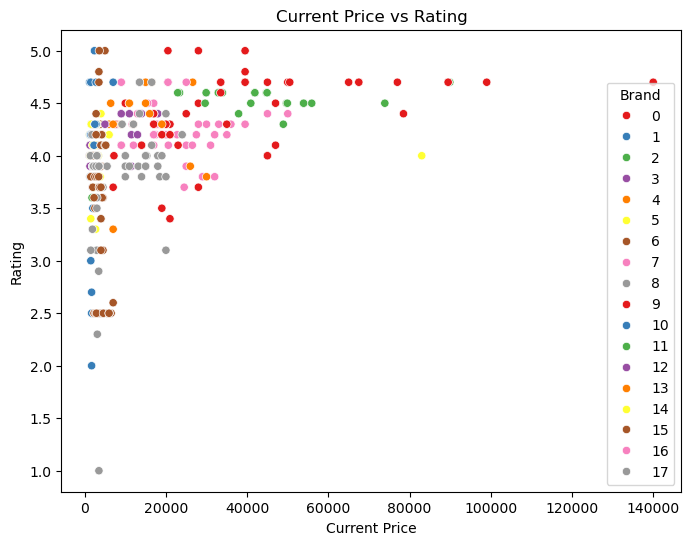

In [119]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=dataset['Current Price'], y=dataset['Rating'], hue=dataset['Brand'], palette='Set1')
plt.title('Current Price vs Rating')
plt.xlabel('Current Price')
plt.ylabel('Rating')
plt.show()

In [121]:
# Distribution of Ratings

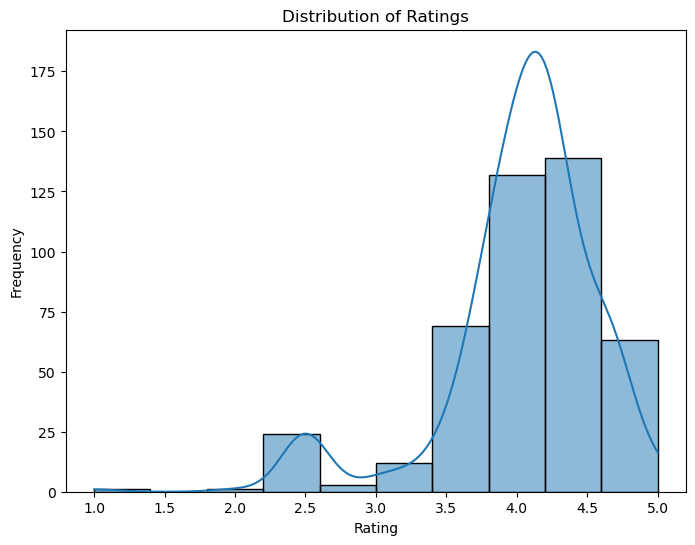

In [123]:
plt.figure(figsize=(8,6))
sns.histplot(dataset['Rating'], bins=10, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [125]:
# Box plot of price by brand

C:\Users\Kanishka\AppData\Local\Temp\ipykernel_15500\2280614090.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Brand', y='Current Price', data=dataset, palette='Set2')


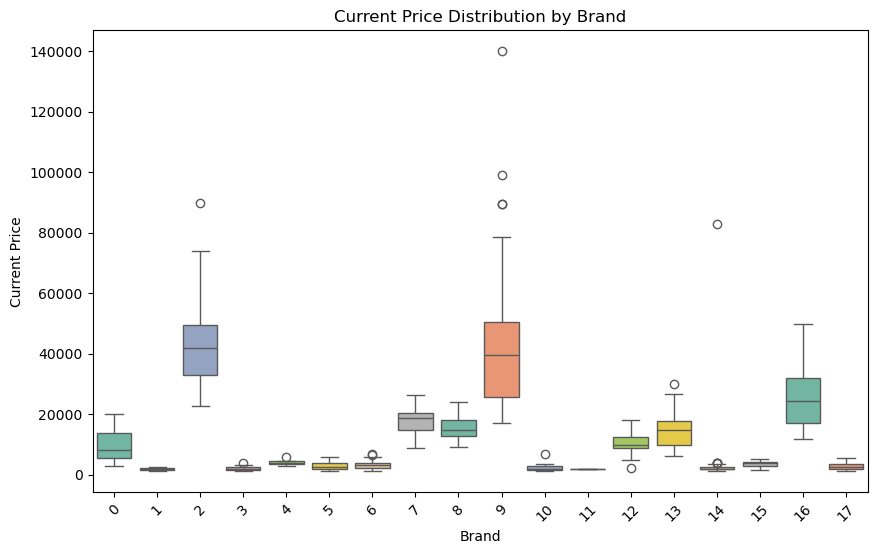

In [127]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Brand', y='Current Price', data=dataset, palette='Set2')
plt.title('Current Price Distribution by Brand')
plt.xticks(rotation=45)
plt.show()

In [129]:
# Feature Importance for Random Forest Regressor

C:\Users\Kanishka\AppData\Local\Temp\ipykernel_15500\3455846809.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette='viridis')


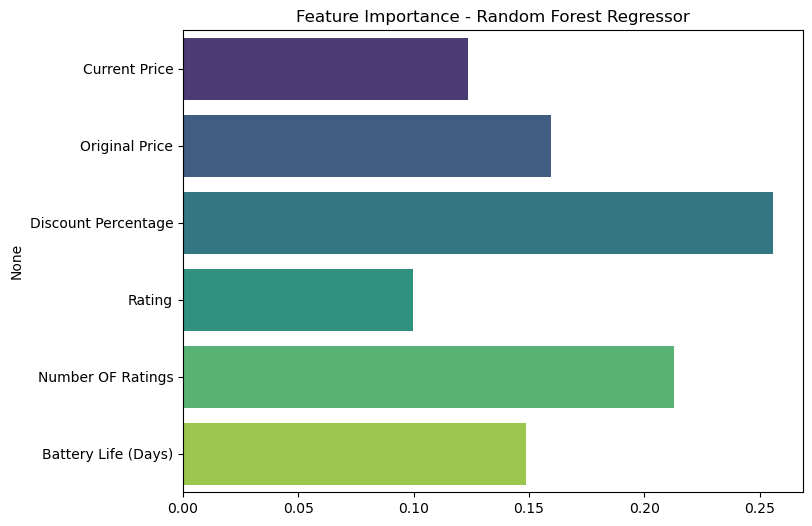

In [131]:
importances = regressor.feature_importances_
features = X.columns

plt.figure(figsize=(8,6))
sns.barplot(x=importances, y=features, palette='viridis')
plt.title('Feature Importance - Random Forest Regressor')
plt.show()

In [133]:
# Confusion matrix heatmap

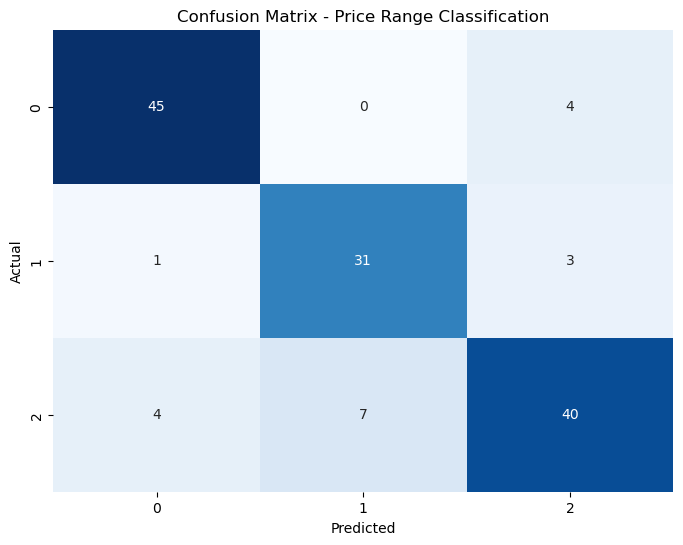

In [135]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_class, y_pred_class)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Price Range Classification')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [137]:
# Pair plot to show clusters

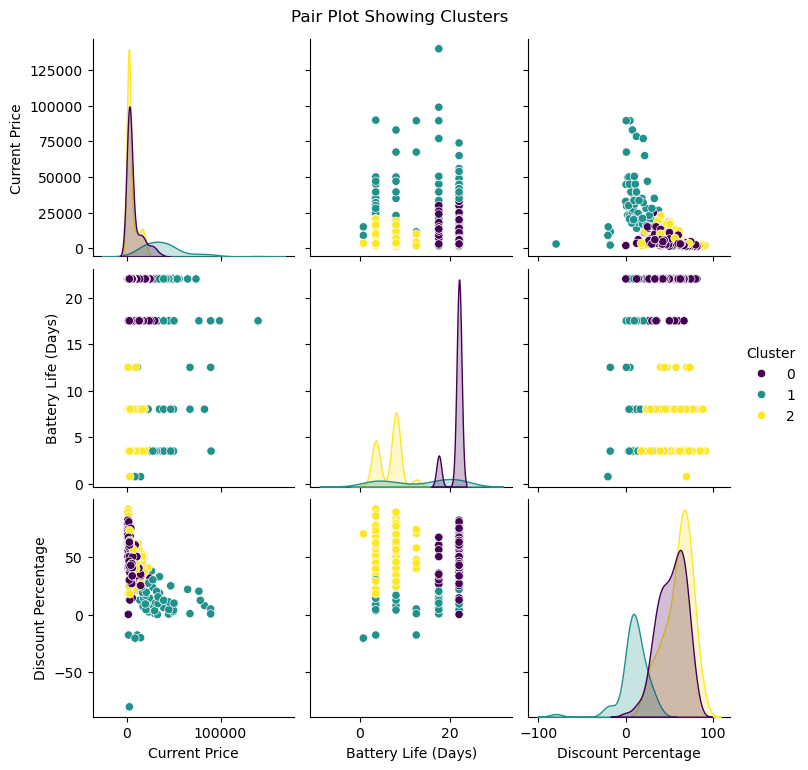

In [139]:
sns.pairplot(dataset[['Current Price', 'Battery Life (Days)', 'Discount Percentage', 'Cluster']], hue='Cluster', palette='viridis')
plt.suptitle('Pair Plot Showing Clusters', y=1.02)
plt.show()

In [159]:
#Cross-Validation for Performance Evaluation

In [167]:
from sklearn.model_selection import cross_val_score
import numpy as np

In [169]:
# Drop rows where y is NaN
non_nan_indices = ~np.isnan(y)
X_non_nan = X[non_nan_indices]
y_non_nan = y[non_nan_indices]

In [171]:
# Perform cross-validation with 5 folds and R-squared as the scoring metric
cv_scores = cross_val_score(regressor, X_non_nan, y_non_nan, cv=5, scoring='r2')

In [173]:
# Print cross-validation scores for each fold
print(f"Cross-validation R-squared scores for each fold: {cv_scores}")

Cross-validation R-squared scores for each fold: [-0.1889544  -0.30989412 -1.11368661 -1.05028785 -0.71028335]


In [175]:
# Calculate and print the mean cross-validation R-squared score
mean_cv_r_squared = np.mean(cv_scores)
print(f"Mean Cross-Validation R-squared: {mean_cv_r_squared}")

Mean Cross-Validation R-squared: -0.6746212637674651


In [185]:
import pandas as pd
import numpy as np

# Check for NaN values in y
print(pd.isnull(y).sum())

6


In [187]:
# Fill NaN values in y with the mean value of y
y_filled = y.fillna(y.mean())

In [191]:
# Check and handle NaN values in y
if pd.isnull(y).sum() > 0:
    # Option 1: Drop rows with NaN values
    non_nan_indices = ~pd.isnull(y)
    X_clean = X[non_nan_indices]
    y_clean = y[non_nan_indices]
    
    # Alternatively, use Option 2 to impute values
    # y_clean = y.fillna(y.mean())

# Proceed with GridSearchCV using the cleaned data
grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_clean, y_clean)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='r2')

In [195]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid (adjust this as needed)
param_grid = {
    'n_estimators': [50, 100, 200],   # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4]     # Minimum samples required at each leaf node
}

# Initialize GridSearchCV with the cleaned data
grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)

# Fit the grid search to the cleaned data
grid_search.fit(X_clean, y_clean)

# Print the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best R-squared score from GridSearch:", grid_search.best_score_)


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Best R-squared score from GridSearch: -0.5550255860774396


In [197]:
# Use the best estimator from grid search
best_model = grid_search.best_estimator_

# Fit the model on the entire dataset
best_model.fit(X_clean, y_clean)

# Predict and calculate R-squared or other metrics
from sklearn.metrics import r2_score, mean_squared_error

# Make predictions on the training data (or use a test set if available)
y_pred = best_model.predict(X_clean)

# Calculate R-squared and MSE
r2 = r2_score(y_clean, y_pred)
mse = mean_squared_error(y_clean, y_pred)

print(f"R-squared of the best model: {r2}")
print(f"Mean Squared Error of the best model: {mse}")


R-squared of the best model: 0.7057212452929087
Mean Squared Error of the best model: 0.0889960211553953


In [199]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation with the best model
cv_scores = cross_val_score(best_model, X_clean, y_clean, cv=5, scoring='r2')

# Print cross-validation results
print(f"Cross-validation R-squared scores: {cv_scores}")
print(f"Mean Cross-Validation R-squared: {np.mean(cv_scores)}")

Cross-validation R-squared scores: [-0.14040468 -0.03645219 -0.8093718  -1.09593758 -0.69296168]
Mean Cross-Validation R-squared: -0.5550255860774396


In [201]:
#CHECKING DATA QUALITY
from sklearn.preprocessing import StandardScaler

# Apply scaling (if needed)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clean)


In [203]:
param_grid = {
    'n_estimators': [50, 100],  # Fewer estimators
    'max_depth': [5, 10, 20],   # Reduced max depth to prevent overfitting
    'min_samples_split': [2, 5] # Fewer options to reduce complexity
}


In [205]:
param_grid = {
    'n_estimators': [100],
    'max_depth': [5, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4]
}


In [231]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.1, random_state=42)

# Fit the best model on the train set and evaluate on the test set
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)
y_test_pred = best_model.predict(X_test)

r2_test = r2_score(y_test, y_test_pred)
print(f"R-squared on the test set: {r2_test}")

R-squared on the test set: 0.46184910184711625


In [233]:
#RandomizedSearchCV Tune 

In [237]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor

In [243]:
# Imputing missing values if present
X = X.fillna(X.mean())
y = y.fillna(y.mean())


In [245]:
# Splitting the data into train and test set (10% test size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [247]:
# Creating polynomial features (to capture non-linear relationships)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [249]:
# Scaling the features
scaler = StandardScaler()
X_train_poly = scaler.fit_transform(X_train_poly)
X_test_poly = scaler.transform(X_test_poly)

In [253]:
# Defining multiple models for comparison
models = {
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'RandomForest': RandomForestRegressor(),
    'GradientBoosting': GradientBoostingRegressor(),
}

In [255]:
# 4. Model Evaluation
best_model = None
best_r2 = -np.inf

for name, model in models.items():
    model.fit(X_train_poly, y_train)
    y_pred = model.predict(X_test_poly)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{name} - R-squared: {r2}, MSE: {mse}")
    
    if r2 > best_r2:
        best_r2 = r2
        best_model = model

print(f"Best Model: {best_model}, Best R-squared: {best_r2}")


Ridge - R-squared: 0.12371372619749044, MSE: 0.4340520306057115
Lasso - R-squared: -0.0898953741462587, MSE: 0.5398593067572942
ElasticNet - R-squared: -0.0898953741462587, MSE: 0.5398593067572942
RandomForest - R-squared: 0.44580809737048877, MSE: 0.27450860280825873
GradientBoosting - R-squared: 0.43756291041487216, MSE: 0.27859270208928394
Best Model: RandomForestRegressor(), Best R-squared: 0.44580809737048877
